In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotnine
import scipy as sp
import statsmodels

from scipy import stats

# Chi-squared example

<https://gist.github.com/kylebgorman/2c2f69c807a3b9a092349d6c6455bed1>

In [2]:
d = np.array([[484, 762], [477, 468], [239, 327]])
d

array([[484, 762],
       [477, 468],
       [239, 327]])

In [3]:
d[0,0]

484

In [4]:
d[0,1]

762

In [5]:
d[0,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [6]:
dparty = d.sum(axis=1, keepdims=True)
dparty

array([[1246],
       [ 945],
       [ 566]])

In [7]:
dgender = d.sum(axis=0, keepdims=True)
dgender

array([[1200, 1557]])

In [8]:
dind = (dparty @ dgender) / dgender.sum()
dind

array([[542.32861806, 703.67138194],
       [411.31664853, 533.68335147],
       [246.35473341, 319.64526659]])

In [9]:
d

array([[484, 762],
       [477, 468],
       [239, 327]])

In [10]:
d - dind

array([[-58.32861806,  58.32861806],
       [ 65.68335147, -65.68335147],
       [ -7.35473341,   7.35473341]])

In [11]:
(d - dind)**2 / dind

array([[ 6.27336927,  4.83496668],
       [10.48900567,  8.08401208],
       [ 0.21956998,  0.16922542]])

In [12]:
((d - dind)**2 / dind).sum()

30.07014909575468

In [13]:
(chi2, p, df, _) = stats.chi2_contingency(d)
print(f"Chi^2:\t\t{chi2:.2f}")
print(f"d.f.:\t\t{df}")
print(f"P(Chi^2):\t{p:.4f}")

Chi^2:		30.07
d.f.:		2
P(Chi^2):	0.0000


# Fisher exact test example

<https://gist.github.com/kylebgorman/2c1a840cbff3ab35a6709528a01e2ff8>

In [14]:
d = np.array([[3, 1], [1, 3]])
d

array([[3, 1],
       [1, 3]])

In [15]:
d = np.array([[4, 0], [0, 4]])
d

array([[4, 0],
       [0, 4]])

In [16]:
(_, p) = stats.fisher_exact(d)
print(f"P(Fisher):\t{p:.4f}")

P(Fisher):	0.0286


# Correlation example

<https://gist.github.com/kylebgorman/0fecddad56efbc72f80ef2d3ad53f979>

In [17]:
SOURCE = "albright_hayes_2003.tsv"

d = pd.read_csv(SOURCE, sep="\t")
d

,phones,rating,bigram_score
0,S L EY1 M,5.84,17.468722
1,W IH1 S,5.84,11.207508
2,P IH1 N T,5.67,13.045776
3,P AE1 NG K,5.63,13.723013
4,S T IH1 P,5.53,12.598640
...,...,...,...
81,P L OW1 N TH,2.26,22.804817
82,TH EY1 P T,2.26,23.380083
83,S M IY1 N TH,2.06,25.043146
84,S P R AA1 R F,2.05,24.031096


In [18]:
x = d.bigram_score
y = d.rating

print(x)
print(y)

0     17.468722
1     11.207508
2     13.045776
3     13.723013
4     12.598640
        ...    
81    22.804817
82    23.380083
83    25.043146
84    24.031096
85    23.205478
Name: bigram_score, Length: 86, dtype: float64
0     5.84
1     5.84
2     5.67
3     5.63
4     5.53
      ... 
81    2.26
82    2.26
83    2.06
84    2.05
85    1.74
Name: rating, Length: 86, dtype: float64


In [19]:
# The pvalues are usually tiny if there's a lot of data.
(stat, p) = stats.pearsonr(x, y)
print(f"Pearson R:\t{stat:.4f}\t(P = {p:.4f})")

Pearson R:	-0.7457	(P = 0.0000)


In [20]:
(stat, p) = stats.spearmanr(x, y)
print(f"Spearman rho:\t{stat:.4f}\t(P = {p:.4f})")

Spearman rho:	-0.6987	(P = 0.0000)


In [21]:
(stat, p) = stats.kendalltau(x, y)
print(f"Kendall tau:\t{stat:.4f}\t(P = {p:.4f})")

Kendall tau:	-0.4994	(P = 0.0000)


# Scatter plot correlation example

<https://gist.github.com/kylebgorman/fc138ca5693dc3fd0f51070cd8a596e7>

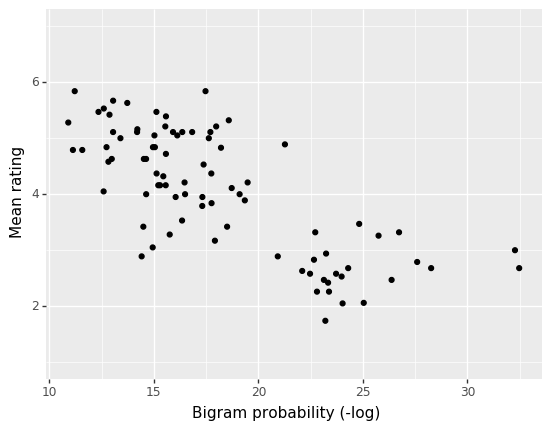

<ggplot: (8772032303561)>

In [22]:
SOURCE = "albright_hayes_2003.tsv"

d = pd.read_csv(SOURCE, sep="\t")

p = (
    plotnine.ggplot(d, plotnine.aes(x="bigram_score", y="rating"))
    + plotnine.geom_point()
    + plotnine.xlab("Bigram probability (-log)")
    + plotnine.ylab("Mean rating")
    + plotnine.ylim(1, 7)
)
p

/home/mim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


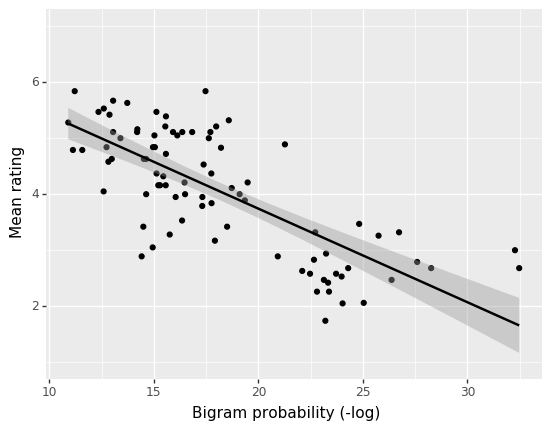

<ggplot: (8772032303561)>

In [23]:
p += plotnine.geom_smooth(method="lm")
p

# Anscombe's quartet example

<https://gist.github.com/kylebgorman/cba6f20cf241d4451b99d6d8a2fae9c0>

In [24]:
# A Pandas `DataFrame` object, with data copied from R.
d = statsmodels.api.datasets.get_rdataset("anscombe").data
d

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [25]:
# Converts from "wide" to "long" format.
d["id"] = d.index
d = pd.wide_to_long(d, ["x", "y"], i="id", j="facets")
d.reset_index(level="facets", inplace=True)
d

,facets,x,y
id,,,
0,1,10,8.04
1,1,8,6.95
2,1,13,7.58
3,1,9,8.81
4,1,11,8.33
5,1,14,9.96
6,1,6,7.24
7,1,4,4.26
8,1,12,10.84


/home/mim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


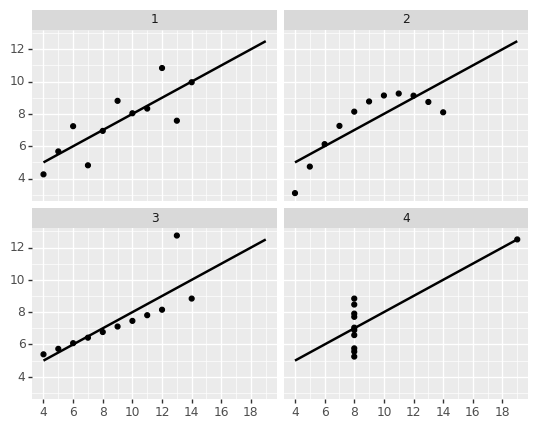

<ggplot: (8772025913285)>

In [26]:
p = (
    plotnine.ggplot(d, plotnine.aes(x="x", y="y"))
    + plotnine.geom_point()
    + plotnine.geom_smooth(method="lm", se=False, fullrange=True)
    + plotnine.facet_wrap("facets")
    + plotnine.scale_x_continuous(breaks=[4, 6, 8, 10, 12, 14, 16, 18])
    + plotnine.scale_y_continuous(breaks=[4, 6, 8, 10, 12])
    + plotnine.xlab("")
    + plotnine.ylab("")
)
p

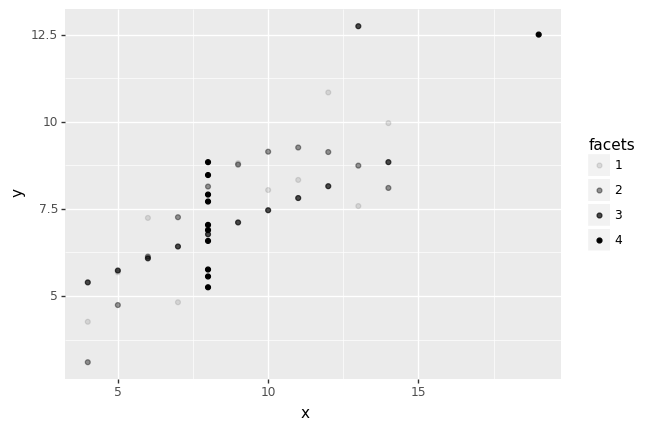

<ggplot: (8772025259237)>

In [27]:
(
    plotnine.ggplot(d, plotnine.aes(x="x", y="y", alpha="facets"))
    + plotnine.geom_point()
#     + plotnine.facet_wrap("facets")
#     + plotnine.geom_smooth(method="lm", se=False, fullrange=True)
#     + plotnine.scale_x_continuous(breaks=[4, 6, 8, 10, 12, 14, 16, 18])
#     + plotnine.scale_y_continuous(breaks=[4, 6, 8, 10, 12])
#     + plotnine.xlab("")
#     + plotnine.ylab("")
)

In [28]:
def correlate(x, y):
    (stat, p) = stats.pearsonr(x, y)
    print(f"Pearson R:\t{stat:.4f}\t(P = {p:.4f})")
    (stat, p) = stats.spearmanr(x, y)
    print(f"Spearman rho:\t{stat:.4f}\t(P = {p:.4f})")
    (stat, p) = stats.kendalltau(x, y)
    print(f"Kendall tau:\t{stat:.4f}\t(P = {p:.4f})")

In [29]:
d = statsmodels.api.datasets.get_rdataset("anscombe").data

correlate(d['x1'], d['y1'])

Pearson R:	0.8164	(P = 0.0022)
Spearman rho:	0.8182	(P = 0.0021)
Kendall tau:	0.6364	(P = 0.0057)


In [30]:
correlate(d['x2'], d['y2'])

Pearson R:	0.8162	(P = 0.0022)
Spearman rho:	0.6909	(P = 0.0186)
Kendall tau:	0.5636	(P = 0.0165)


In [31]:
correlate(d['x3'], d['y3'])

Pearson R:	0.8163	(P = 0.0022)
Spearman rho:	0.9909	(P = 0.0000)
Kendall tau:	0.9636	(P = 0.0000)


In [32]:
correlate(d['x4'], d['y4'])

Pearson R:	0.8165	(P = 0.0022)
Spearman rho:	0.5000	(P = 0.1173)
Kendall tau:	0.4264	(P = 0.1138)
